In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.integrate import solve_ivp
import warnings
warnings.filterwarnings('ignore')  
plt.rcParams['text.usetex'] = True

In [25]:
def my_plot(f,const,s0,t0,tf,topic,topic1):
    T = np.linspace(t0, tf, 5000)
    soln = solve_ivp(f,[t0, tf], s0, args=const,dense_output=True)
    X,Y,Z = soln.sol(T)

    
    fig = plt.figure(figsize=(34,18))
    fig.suptitle(topic+'\n'+topic1, fontsize=30,y=1.1)

    gs=fig.add_gridspec(3,3)
    ax1=fig.add_subplot(gs[:,2],projection='3d')
    ax2=fig.add_subplot(gs[0,0])
    ax3=fig.add_subplot(gs[1,0])
    ax4=fig.add_subplot(gs[2,0])
    ax5=fig.add_subplot(gs[0,1])
    ax6=fig.add_subplot(gs[1,1])
    ax7=fig.add_subplot(gs[2,1])
    ax1.xaxis.set_pane_color((1,1,1,1))
    ax1.yaxis.set_pane_color((1,1,1,1))
    ax1.zaxis.set_pane_color((1,1,1,1))
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    s = 10
    n = 10000
    for i in range(0,n-s,s):
        ax1.plot(X[i:i+s+1], Y[i:i+s+1], Z[i:i+s+1], color=plt.cm.hsv((i+1)/n), linewidth=0.5)
        ax2.plot(T,X,'g', linewidth=0.5)
        ax3.plot(T,Y,'r', linewidth=0.7)
        ax4.plot(T,Z,'b', linewidth=0.5)
        ax5.plot(X[i:i+s+1],Y[i:i+s+1], color=plt.cm.hsv((i+1)/n), linewidth=0.5)
        ax6.plot(Y[i:i+s+1],Z[i:i+s+1], color=plt.cm.hsv((i+1)/n), linewidth=0.5)
        ax7.plot(X[i:i+s+1],Z[i:i+s+1], color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    ax2.legend(['x'])
    ax3.legend(['y'])
    ax4.legend(['z'])
    plt.show()

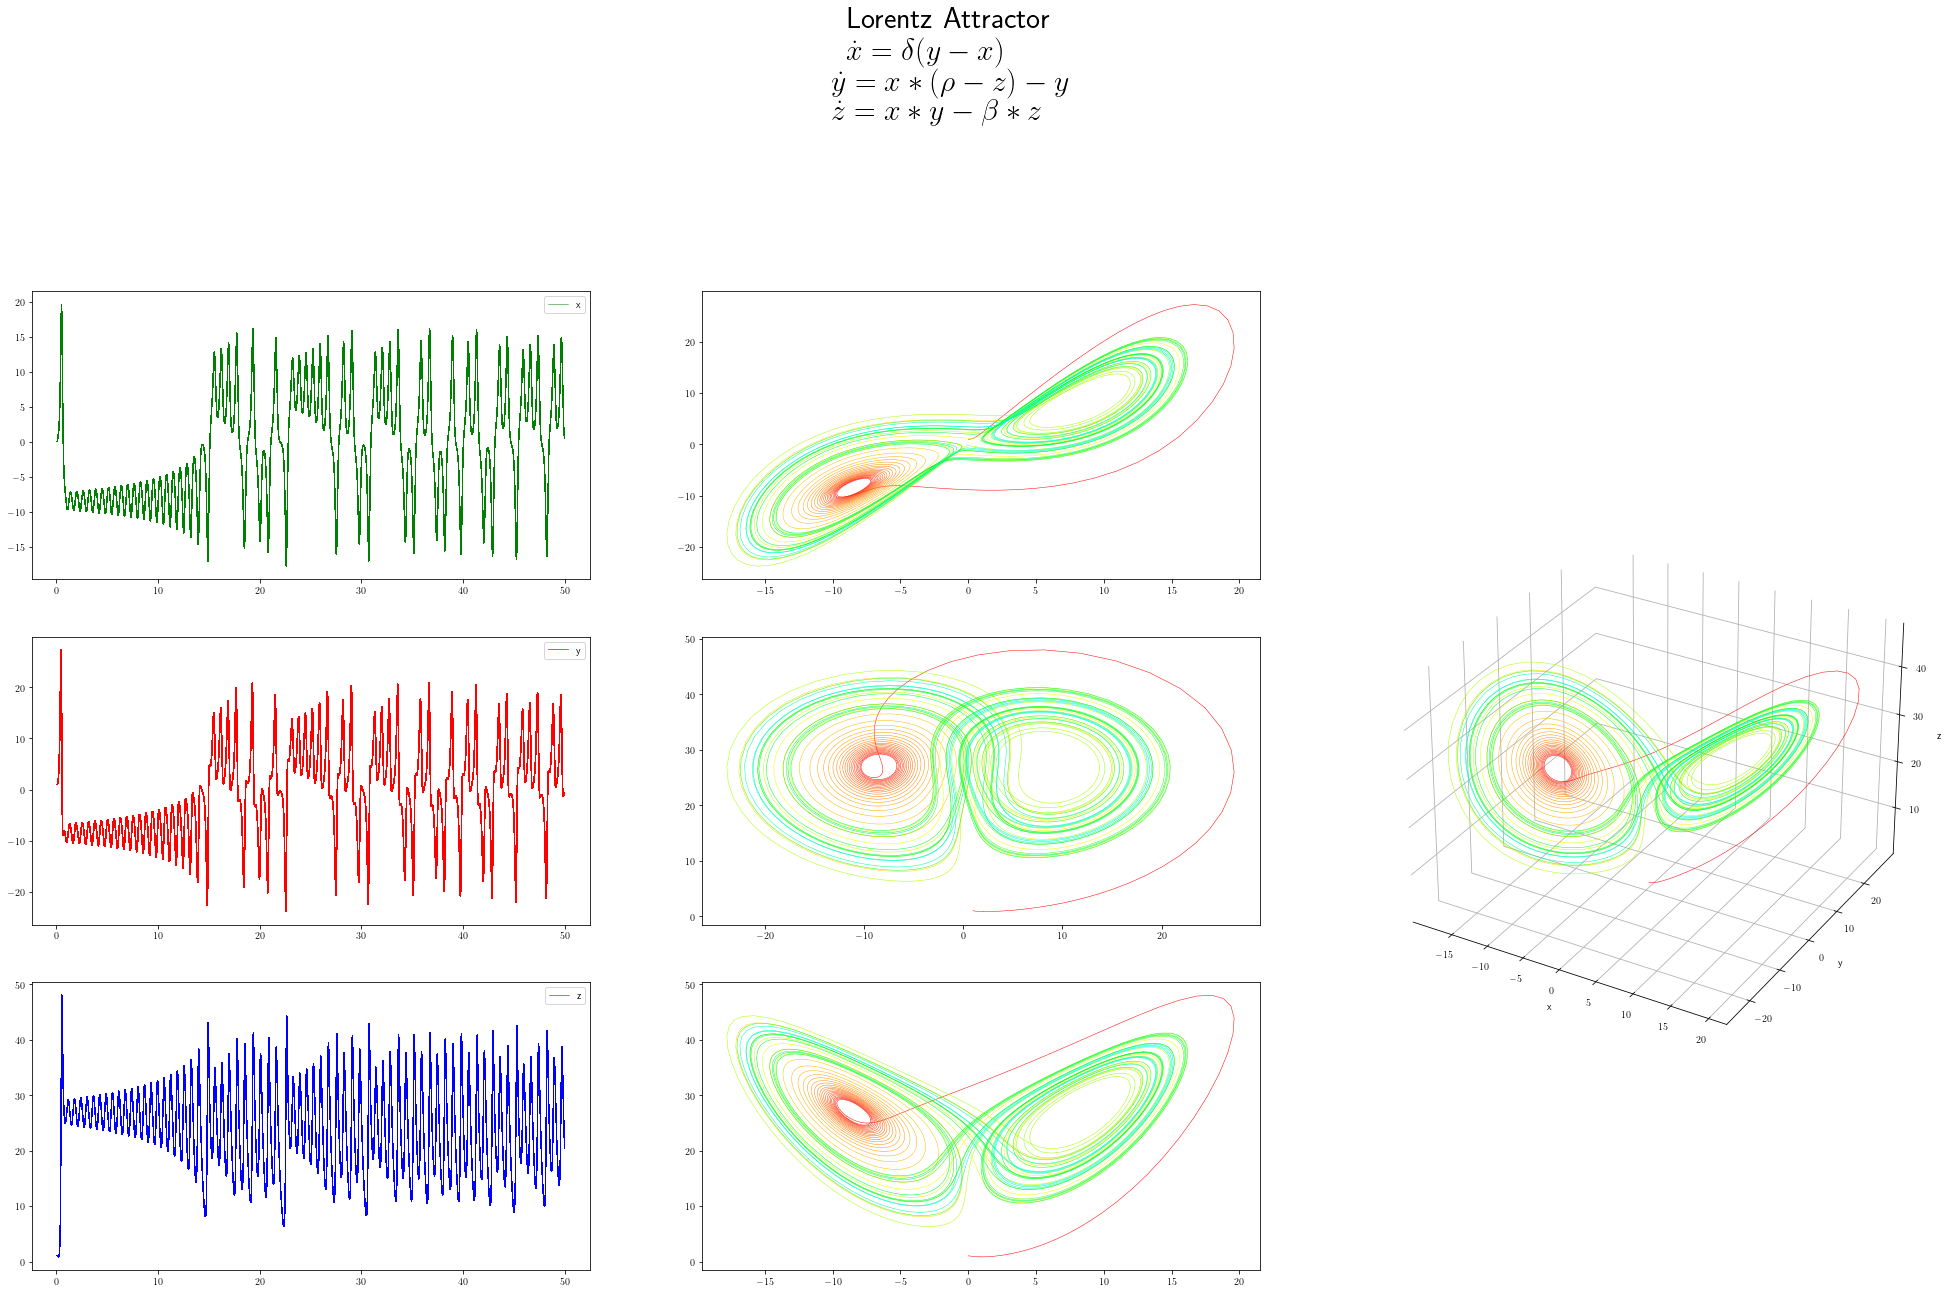

In [26]:
def my_lorenz(t, S, sigma, rho, beta):
    x,y,z=S
    dx=sigma*(y-x)
    dy=x*(rho-z)-y
    dz=x*y-beta*z
    dS=np.array([dx,dy,dz])
    return dS

sigma = 10
rho = 28
beta = 8/3
const=(sigma, rho, beta)

t0 = 0.1
tf = 50
s0 = np.array([0, 1, 1.05])
my_plot(my_lorenz,const,s0,t0,tf,'Lorentz Attractor',
        r'$\dot{x}= \delta(y-x)  \\ \dot{y}= x*(\rho-z)-y \\ \dot{z}=x*y-{\beta* z} $')

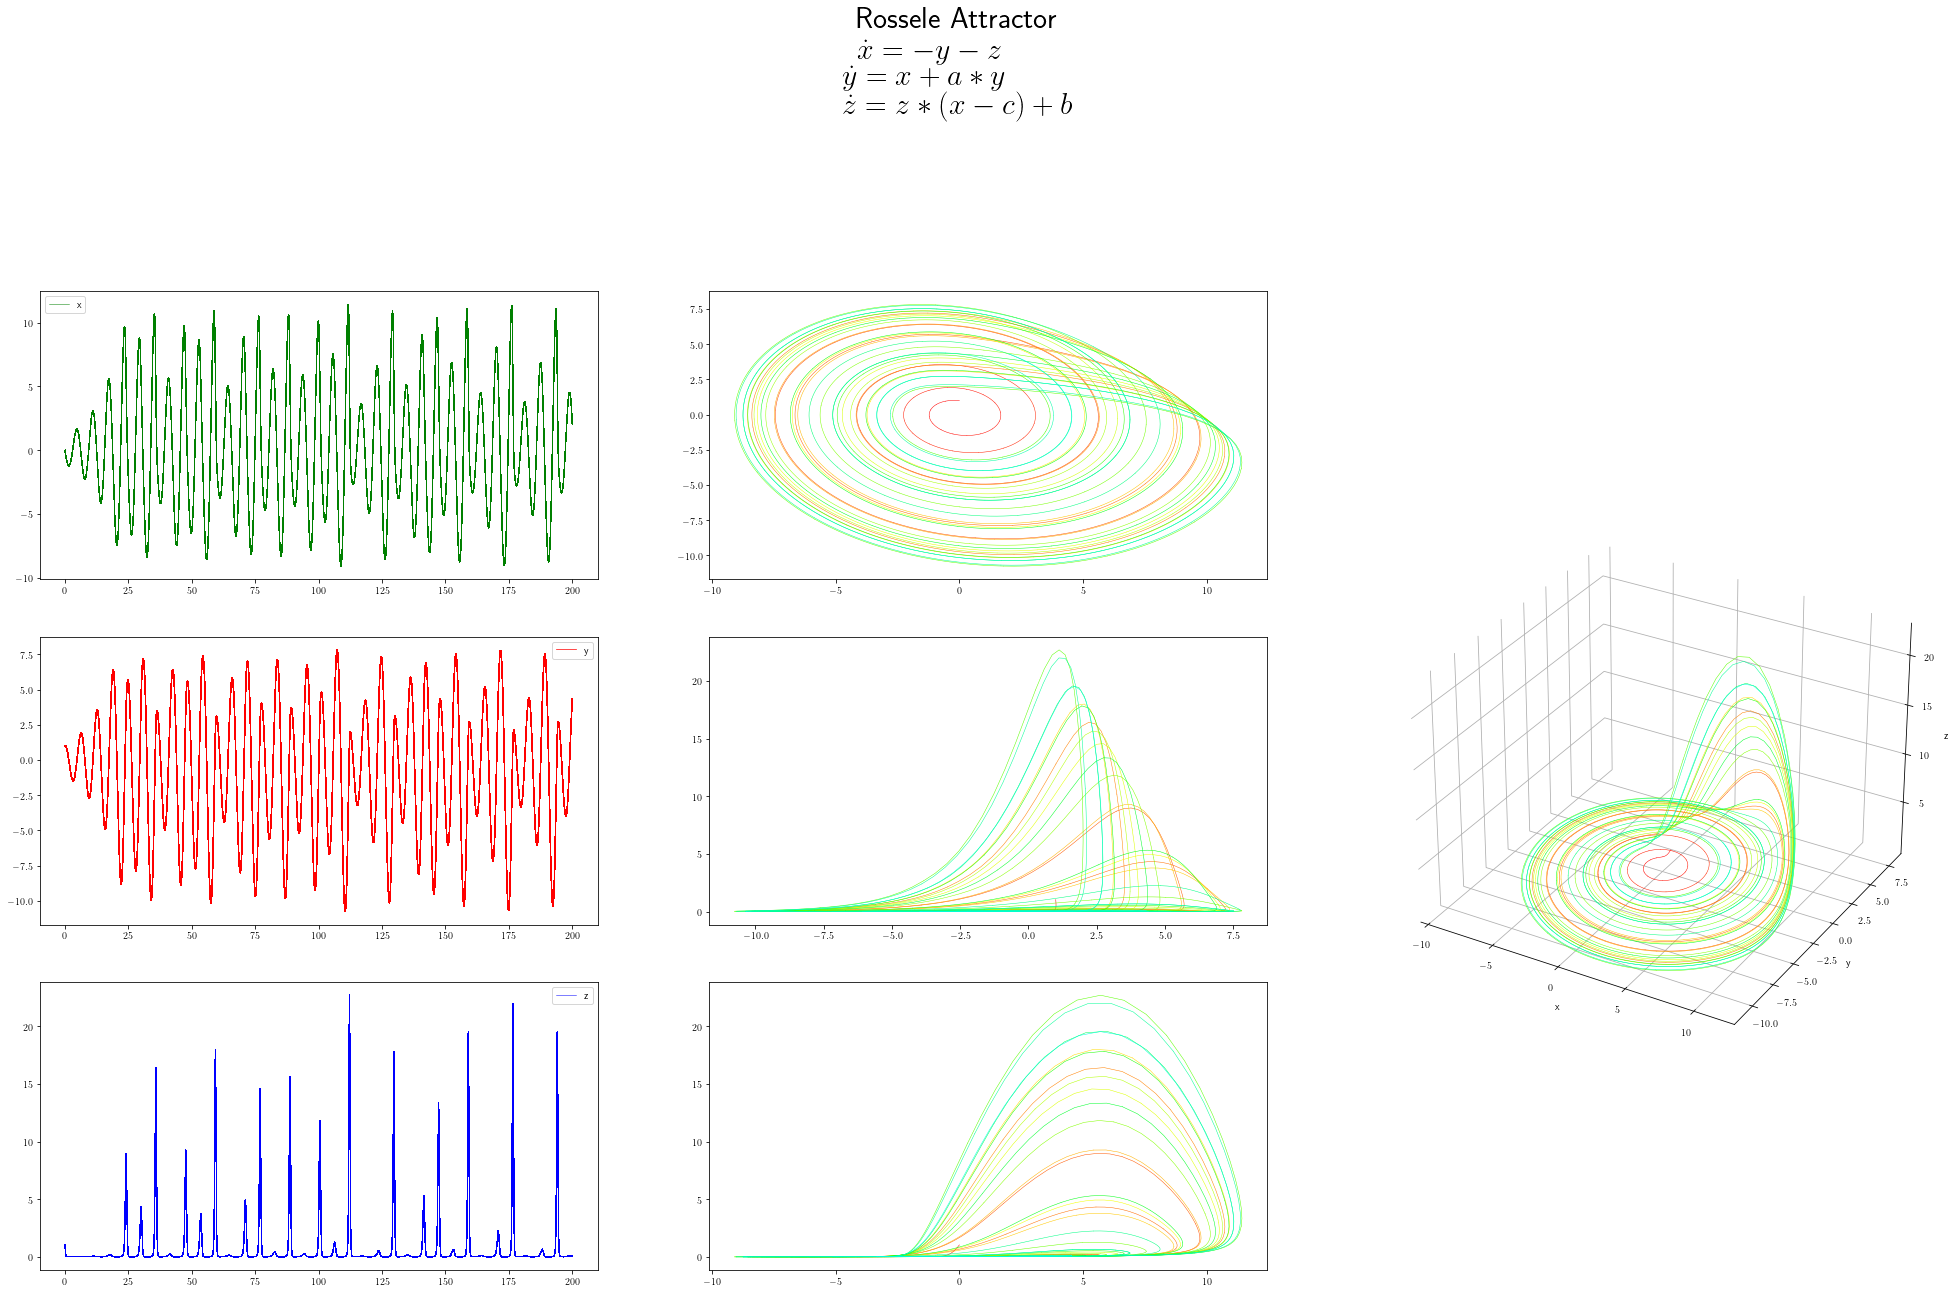

In [27]:
def my_rosseler(t, S, a,b,c):
    x, y, z = S
    dx_dt = -y-z
    dy_dt = x+a*y
    dz_dt = b+z*(x-c)
    dS=np.array([dx_dt, dy_dt, dz_dt])
    return dS

a,b,c=0.2,0.2,5.7
const=(a,b,c)
t0 = 0.1
tf = 200
s0 = np.array([0, 1, 1.05])
my_plot(my_rosseler,const,s0,t0,tf,'Rossele Attractor',
        r'$\dot{x}= -y-z  \\ \dot{y}= x+a*y \\ \dot{z}= z*(x- c)+b $')